:::{canonical-tutorial} tutorials/trajectories/paga-paul15
:::

# Trajectory inference for hematopoiesis in mouse

:::{seealso}
More examples for trajectory inference on complex datasets can be found in the
[PAGA][] repository {cite:p}`Wolf2019`, for instance, multi-resolution analyses of whole animals,
such as for [planaria][] for data of {cite:t}`Plass2018`.

[PAGA]: https://github.com/theislab/paga
[planaria]: https://nbviewer.jupyter.org/github/theislab/paga/blob/master/planaria/planaria.ipynb


```{image} /_static/img/tutorials/paga_planaria.png
:width: 350px
:align: center
```
:::

Reconstructing myeloid and erythroid differentiation for data of {cite:t}`Paul2015`.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy as sc

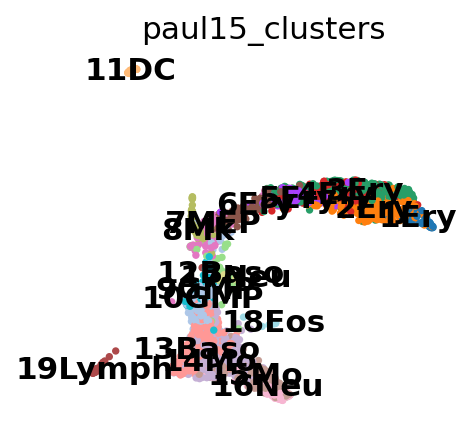

In [9]:
sc.pl.draw_graph(adata, color="paul15_clusters", legend_loc="on data")

This looks pretty messy.

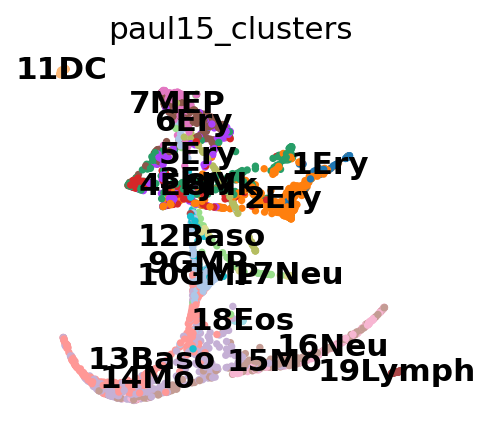

In [12]:
sc.pl.draw_graph(adata, color="paul15_clusters", legend_loc="on data")

This still looks messy, but in a different way: a lot of the branches are overplotted.

In [13]:
sc.tl.louvain(adata, resolution=1.0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 25 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


Annotate the clusters using marker genes.

| cell type | marker |
| --- | --- |
|HSCs | Procr |
|Erythroids | Gata1, Klf1, Epor, Gypa, Hba-a2, Hba-a1, Spi1 |
|Neutrophils | Elane, Cebpe, Ctsg, Mpo, Gfi1 |
|Monocytes | Irf8, Csf1r, Ctsg, Mpo |
|Megakaryocytes | Itga2b (encodes protein CD41), Pbx1, Sdpr, Vwf |
|Basophils | Mcpt8, Prss34 |
|B cells | Cd19, Vpreb2, Cd79a |
|Mast cells| Cma1, Gzmb, CD117/C-Kit |
|Mast cells & Basophils| Ms4a2, Fcer1a, Cpa3, CD203c (human)|

For simple, coarse-grained visualization, compute the PAGA graph, a coarse-grained and simplified (abstracted) graph. Non-significant edges in the coarse- grained graph are thresholded away.

--> added 'pos', the PAGA positions (adata.uns['paga'])


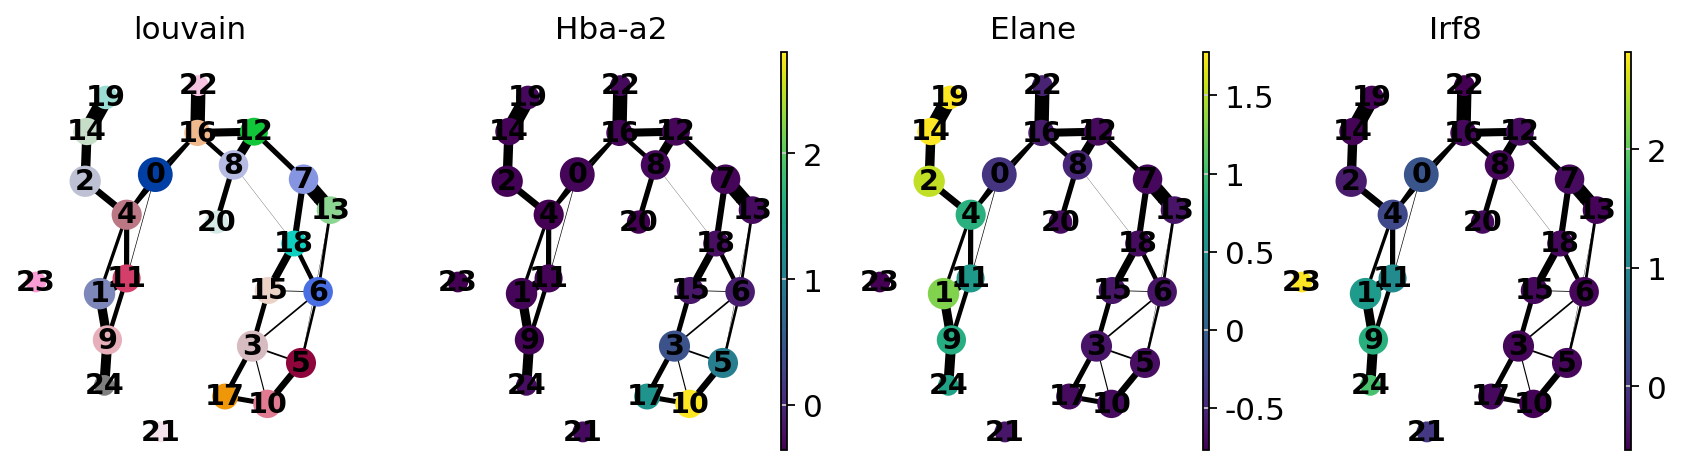

In [15]:
sc.pl.paga(adata, color=["louvain", "Hba-a2", "Elane", "Irf8"])

--> added 'pos', the PAGA positions (adata.uns['paga'])


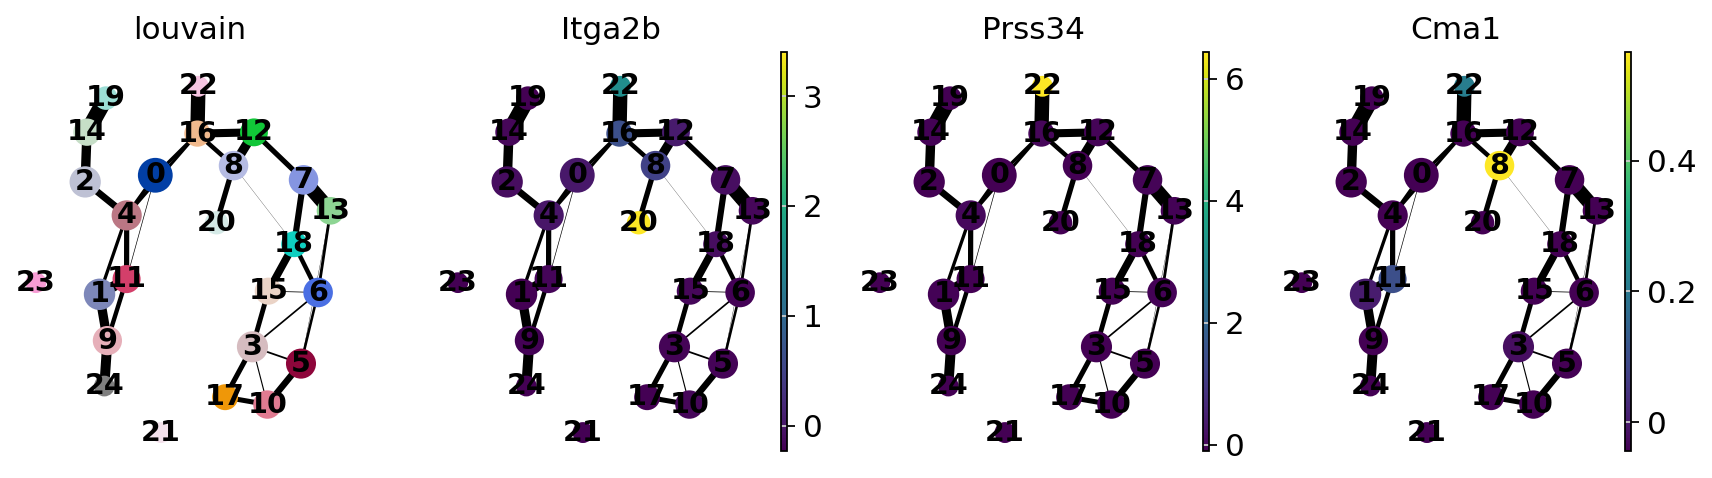

In [16]:
sc.pl.paga(adata, color=["louvain", "Itga2b", "Prss34", "Cma1"])

Actually annotate the clusters --- note that *Cma1* is a Mast cell marker and only appears in a small fraction of the cells in the progenitor/stem cell cluster 8, see the single-cell resolved plot below.